## CASE STUDY: LATE DELIVERY ROOT CAUSE

##### READING THE DATA

The below code reads the data from excel file using python package pandas

In [94]:
import pandas as pd

data=pd.read_excel(r"D:\files\5th Sem\MS4110-Introduction to Data Analytics\assignment\CASE STUDY_DATA_LATE DELIVERY ROOT CAUSE.xlsx")

In [131]:
data.head()
data.drop(['delivered_to_plan'],axis=0).to_excel('testing_X')

KeyError: "labels ['delivered_to_plan'] not contained in axis"

In [96]:
data.describe(include='all')
#we can see the number of unique categories in the categorical data

,order_id,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,datetime_ordered,datetime_sourced,datetime_product_ready,datetime_planned,deadline_source,deadline_make,deadline_deliver,delivered_to_plan
count,79999,79999,79999,79999.000000,79999,79999,79999,79999.000000,79999,79999,79999,79999,79464.000000,79999.000000,79999.000000,79999
unique,79999,5,4,NaN,6,3,2,NaN,78681,72611,77461,127,NaN,NaN,NaN,2
top,E00014642,GERMANY,Ground,NaN,AUGSBURG,JACKETS & VESTS,Y,NaN,2016-08-20 17:03:18,2016-09-16 08:39:53,2016-07-11 11:38:10,2016-09-30 00:00:00,NaN,NaN,NaN,PASS
freq,1,46259,55494,NaN,19080,48523,41168,NaN,8,6,4,1539,NaN,NaN,NaN,70978
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-07-03 00:08:43,2016-07-03 02:16:18,2016-07-03 06:16:55,2016-07-05 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-21 17:55:30,2016-11-10 00:33:50,2016-11-10 19:30:18,2016-11-17 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.040013,NaN,NaN,NaN,2.338067,NaN,NaN,NaN,NaN,1349.708975,41.173127,3.450756,NaN
std,NaN,NaN,NaN,0.466923,NaN,NaN,NaN,0.992345,NaN,NaN,NaN,NaN,1104.229891,25.686936,1.617486,NaN
min,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,484.000000,23.000000,2.000000,NaN


In [97]:
for i in data:
    print(i,data[i].dtype,sep='\t\t\t',end='\n')
#confirming the data type of the date time variables as datetime64[ns] which can
# be specially operated to find time intervals

order_id			object
country			object
shipping_method			object
units_per_order			int64
facility			object
product_category			object
on_sale			object
transit_days			int64
datetime_ordered			datetime64[ns]
datetime_sourced			datetime64[ns]
datetime_product_ready			datetime64[ns]
datetime_planned			datetime64[ns]
deadline_source			float64
deadline_make			int64
deadline_deliver			int64
delivered_to_plan			object


##### CREATING NEW COLUMNS THAT RECORD THE TIME INTERVAL BETWEEN DATES

We create new columns to record the time intervals between the carious dates and the time ordered as this is easier to work with and captures the necessary information from this data

In [98]:
#cell pending deletion;was used to confirm the units of the three columns


from datetime import timedelta
# for i,j in enumerate((data.datetime_sourced-data.datetime_ordered)):
#     print(j.seconds/60,data.deadline_source[i])
print(((data.datetime_sourced-data.datetime_ordered).map(lambda x: x.seconds/(60))<data.deadline_source).values.sum(),
      (((data.datetime_product_ready-data.datetime_ordered).map(lambda x: int(x.seconds/(3600))))<data.deadline_make).values.sum(),
      (((data.datetime_product_ready-data.datetime_ordered).map(lambda x: int(x.days/(1))))<data.deadline_deliver).values.sum())
print(((data.datetime_sourced-data.datetime_ordered).map(lambda x: x.seconds/(60))>data.deadline_source).values.sum(),
      (((data.datetime_product_ready-data.datetime_ordered).map(lambda x: int(x.seconds/(3600))))>data.deadline_make).values.sum(),
      (((data.datetime_product_ready-data.datetime_ordered).map(lambda x: int(x.days/(1))))>data.deadline_deliver).values.sum())

76275 68090 71902
3189 9736 2760


In [99]:
#converting the given dates to time intervals which ccan be worked with. check the lambda
# function for conversion to seconds minutes or days

data['time_sourced']=(data.datetime_sourced-data.datetime_ordered).map(lambda x:int(x.seconds/(60)))
data['time_make']=(data.datetime_product_ready-data.datetime_ordered).map(lambda x: int(x.seconds/(3600)))
data['time_ready']=(data.datetime_product_ready-data.datetime_ordered).map(lambda x: int(x.days/(1)))

##### IMPUTING NULL VALUES

In [100]:
#checking for null values in columns

for i in data:
    print(i,data[i].isnull().values.any(),sep='\t\t\t')
    

order_id			False
country			False
shipping_method			False
units_per_order			False
facility			False
product_category			False
on_sale			False
transit_days			False
datetime_ordered			False
datetime_sourced			False
datetime_product_ready			False
datetime_planned			False
deadline_source			True
deadline_make			False
deadline_deliver			False
delivered_to_plan			False
time_sourced			False
time_make			False
time_ready			False


In [101]:
#surveying the null values. Below the dataset we can see 535 null values

data[data.isnull().values]

,order_id,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,datetime_ordered,datetime_sourced,datetime_product_ready,datetime_planned,deadline_source,deadline_make,deadline_deliver,delivered_to_plan,time_sourced,time_make,time_ready
25,E00000026,FRANCE,Ground,1,ANTWERP,TOPS,Y,4,2016-07-03 04:52:12,2016-07-03 07:17:09,2016-07-03 09:17:13,2016-07-06,NaN,3,4,PASS,144,4,0
34,E00000035,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,N,3,2016-07-03 05:42:00,2016-07-03 07:16:36,2016-07-03 10:16:49,2016-07-05,NaN,3,3,PASS,94,4,0
37,E00000038,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,Y,3,2016-07-03 06:01:54,2016-07-03 08:16:37,2016-07-03 10:17:00,2016-07-05,NaN,2,3,PASS,134,4,0
39,E00000040,FRANCE,Ground,1,ANTWERP,TOPS,N,3,2016-07-03 06:38:27,2016-07-03 08:17:11,2016-07-04 08:17:50,2016-07-05,NaN,2,3,PASS,98,1,1
40,E00000041,FRANCE,Ground,1,ANTWERP,TOPS,Y,3,2016-07-03 06:39:40,2016-07-03 08:16:57,2016-07-04 03:16:16,2016-07-06,NaN,2,3,PASS,97,20,0
41,E00000042,FRANCE,Ground,1,ANTWERP,TOPS,N,4,2016-07-03 07:16:03,2016-07-03 09:16:34,2016-07-04 04:16:23,2016-07-06,NaN,25,4,PASS,120,21,0
42,E00000043,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,Y,3,2016-07-03 07:33:24,2016-07-03 09:17:23,2016-07-04 04:16:47,2016-07-05,NaN,25,3,FAIL,103,20,0
43,E00000044,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,Y,3,2016-07-03 07:49:19,2016-07-03 09:17:20,2016-07-04 07:18:13,2016-07-06,NaN,25,3,PASS,88,23,0
44,E00000045,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,N,4,2016-07-03 07:55:02,2016-07-03 10:16:45,2016-07-04 05:17:01,2016-07-06,NaN,24,4,FAIL,141,21,0
45,E00000046,FRANCE,Ground,1,ANTWERP,TOPS,Y,4,2016-07-03 07:59:58,2016-07-03 10:16:52,2016-07-04 07:18:00,2016-07-07,NaN,24,4,PASS,136,23,0


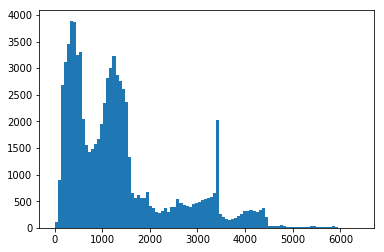

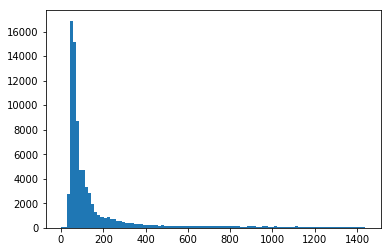

In [102]:
#pending deletion. to check the plot of the misiing na values. Can keep/ expand for aesthetics

import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
import seaborn as sns
%matplotlib inline

plt.hist(data.deadline_source.dropna(),bins=100)
plt.show()
plt.hist(data.time_sourced.dropna(),bins=100)
plt.show()

In [103]:
#creating a new variable data_corr with ehich we can work on our dataset 
# and drop the colums irrelevant to the problem

data_corr=data;
data_corr=data_corr.drop(['order_id','delivered_to_plan','datetime_ordered','datetime_sourced','datetime_product_ready','datetime_planned'],axis=1)
data_corr.head()

,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,deadline_source,deadline_make,deadline_deliver,time_sourced,time_make,time_ready
0,UNITED KINGDOM,Ground,1,OXFORD,ACCESSORIES,Y,2,1612.0,38,3,62,21,2
1,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,N,3,531.0,8,3,127,7,0
2,FRANCE,Ground,1,ANTWERP,TOPS,Y,3,504.0,8,3,100,5,0
3,FRANCE,Ground,1,ANTWERP,JACKETS & VESTS,Y,5,492.0,8,5,88,5,0
4,UNITED KINGDOM,Next Day,1,OXFORD,JACKETS & VESTS,Y,1,1567.0,6,1,244,5,2


In [104]:
#creating a dictionary so that we can map the categorical values. can create the maps manually as well.

col=['country','shipping_method','facility','product_category','on_sale']#categorical colums
tmp=[];
for i,j in enumerate(col):
    a=data_corr[j].unique()
    tmp.append(dict(zip(a,list(range(0,len(a))))))
    print(tmp[i])
    data_corr[j]=data_corr[j].map(tmp[i])
data_corr.head()

{'UNITED KINGDOM': 0, 'FRANCE': 1, 'GERMANY': 2, 'SWEDEN': 3, 'BELGIUM': 4}
{'Ground': 0, 'Next Day': 1, '3-Day': 2, '2-Day': 3}
{'OXFORD': 0, 'ANTWERP': 1, 'MANCHESTER': 2, 'AUGSBURG': 3, 'HANOVER': 4, 'EINDHOVEN': 5}
{'ACCESSORIES': 0, 'JACKETS & VESTS': 1, 'TOPS': 2}
{'Y': 0, 'N': 1}


,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,deadline_source,deadline_make,deadline_deliver,time_sourced,time_make,time_ready
0,0,0,1,0,0,0,2,1612.0,38,3,62,21,2
1,1,0,1,1,1,1,3,531.0,8,3,127,7,0
2,1,0,1,1,2,0,3,504.0,8,3,100,5,0
3,1,0,1,1,1,0,5,492.0,8,5,88,5,0
4,0,1,1,0,1,0,1,1567.0,6,1,244,5,2


In [105]:
#pushin the column with nan values:deadline_source to the front for easy matrix manipulation whic 
# will be required later

a=list(data_corr.columns[0:7])
b=list(data_corr.columns[8:13])
c=[data_corr.columns[7]]
print(c+a+b)
data_corr=data_corr[c+a+b]

['deadline_source', 'country', 'shipping_method', 'units_per_order', 'facility', 'product_category', 'on_sale', 'transit_days', 'deadline_make', 'deadline_deliver', 'time_sourced', 'time_make', 'time_ready']


In [106]:
data_corr.head()

,deadline_source,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,deadline_make,deadline_deliver,time_sourced,time_make,time_ready
0,1612.0,0,0,1,0,0,0,2,38,3,62,21,2
1,531.0,1,0,1,1,1,1,3,8,3,127,7,0
2,504.0,1,0,1,1,2,0,3,8,3,100,5,0
3,492.0,1,0,1,1,1,0,5,8,5,88,5,0
4,1567.0,0,1,1,0,1,0,1,6,1,244,5,2


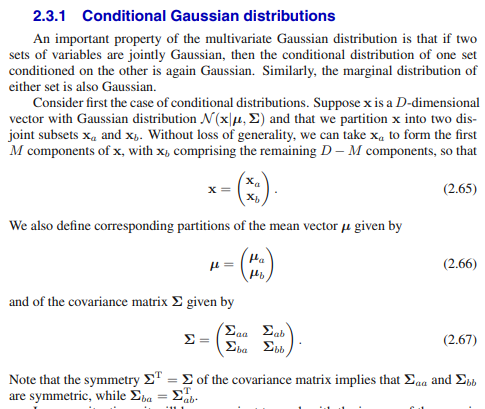
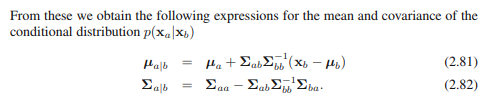

In [107]:
x_b=data_corr[data_corr.isnull().values].iloc[:,1:];#data without the null values
x_b.shape

(535, 12)

In [108]:
import numpy as np 
mew=np.mean(data_corr.dropna(),axis=0)#mean
sigma=np.cov(data_corr.dropna(),rowvar=0)#covariance matrix

mew_a=mew[0].reshape(1,1)#mean of deadline_source
mew_b=mew[1:].values.reshape(12,1)#remaining means

np.set_printoptions(suppress=True,precision=3)
# print(mew.iloc[7])

#see above image
sigma_aa=sigma[0,0].reshape(1,1)
sigma_bb=sigma[1:,1:].reshape(12,12)
sigma_ab=sigma[0,1:].reshape(1,12)
sigma_ba=sigma[1:,0].reshape(12,1)

#mew a|b is the imputed value(src:deovrath mehendale)
#tile will duplicate the mew matrix for 535 rows so as to avoid cubersome for loops;
#use numpy for matrix operations since python does not treat lists as matrices
a= np.tile(mew_a,(535,1))
b=np.matmul(sigma_ab,np.linalg.inv(sigma_bb))
c=np.subtract(x_b,np.tile(mew_b.T,(535,1))).T#reason given above for using tile
d=np.matmul(b,c).T
e=np.add(a,d)
x_a=e
# mew_a_giv_b=(np.tile(mew_a,(535,1))
#              +np.matmul(np.matmul(sigma_ab*np.linalg.inv(sigma_bb)),
#              ((x_b-np.tile(mew_b.T,(535,1)).T))))


#below code pending deletion but very helpful in finding errors for matrix multiplication
print(sigma_aa.shape,sigma_ab.shape,sigma_ba.shape,sigma_bb.shape,sep='\n')
print(np.matmul(sigma_ab,np.linalg.inv(sigma_bb)).shape)
print(mew_b.shape,mew_a.shape)
print(x_a.shape)

(1, 1)
(1, 12)
(12, 1)
(12, 12)
(1, 12)
(12, 1) (1, 1)
(535, 1)


In [109]:
#replacing data corr nan values
data_corr.iloc[list(data_corr[data_corr.isnull().values].index),[0]]=x_a
print(data_corr.isnull().values.any())#double check
data_corr.head()

False


,deadline_source,country,shipping_method,units_per_order,facility,product_category,on_sale,transit_days,deadline_make,deadline_deliver,time_sourced,time_make,time_ready
0,1612.0,0,0,1,0,0,0,2,38,3,62,21,2
1,531.0,1,0,1,1,1,1,3,8,3,127,7,0
2,504.0,1,0,1,1,2,0,3,8,3,100,5,0
3,492.0,1,0,1,1,1,0,5,8,5,88,5,0
4,1567.0,0,1,1,0,1,0,1,6,1,244,5,2


##### GETTING RID OF COLLINEARITY USING VIF(VARIANCE INFLATION FACTOR)

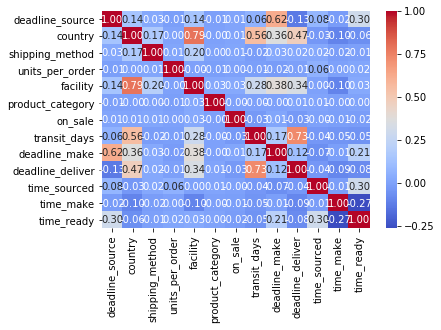

In [110]:
import seaborn as sns

#collinearity heatmap
sns.heatmap(data_corr.corr(),annot=True,fmt=".2f",cmap="coolwarm")

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(data_corr.values.astype('int'), i) for i in range(data_corr.shape[1])]
vif["features"] = data_corr.columns
vif.round(1)


In [111]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values.astype(int), ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables],X.columns[variables]

X,rem_cols=calculate_vif_(data_corr,4)#the second value is the threshold above which vif the columns will be dropped
X.head()

In [112]:
from  sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def PCAconv(data,n=13):
    tmp=StandardScaler().fit_transform(data.values)
    pca = PCA(n_components=n)
    tmp.shape
    # np.isnan(np.min(tmp))
    principalComponents = pca.fit_transform(tmp)
    
    X = pd.DataFrame(data = principalComponents)
    X.shape
    return(X)
X=PCAconv(data_corr,11)

(array([ 9021.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 70978.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

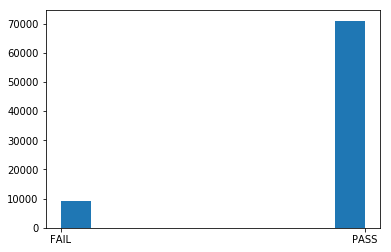

In [113]:
y=data.delivered_to_plan;
plt.hist(y)

In [114]:
y=y.map({'PASS':1,'FAIL':0})
print(y.unique())

[1 0]


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)
print(X_test.head())
X_test.to_excel('Testing_X.xlsx')

(63999, 11) (16000, 11) (63999,) (16000,)
             0         1         2         3         4         5         6   \
35296  0.305284 -0.400108 -0.165571 -0.161297 -0.097040  0.083688 -0.945636   
76320  1.586800  2.319126 -1.061201 -0.260058 -0.244685  0.824860  0.702416   
52169  0.949694 -1.248471  0.094202  0.561604 -1.218560 -0.444318  1.294676   
72365  1.368874 -1.307342 -0.274327  1.408821  0.250461 -0.272076 -1.548576   
307   -3.028746  0.127055  0.039700  0.950526 -0.794722  0.902530  0.069025   

             7         8         9         10  
35296  0.755240 -1.289283 -0.344474  0.659983  
76320 -0.026834 -0.663174  0.627214  0.235601  
52169  0.362888 -1.148241  0.312132 -0.338550  
72365  0.122760  0.120339  0.350973  0.153858  
307    0.140095  0.566471  0.313562  0.183165  


In [116]:
print(y_train.head())
X_train.head()

51812    1
37618    1
35827    0
9492     0
31343    1
Name: delivered_to_plan, dtype: int64


,0,1,2,3,4,5,6,7,8,9,10
51812,-1.049965,-1.382899,0.993124,-0.783753,-0.103150,0.191739,-0.832974,0.543430,-0.072682,-0.602102,0.698788
37618,0.834674,2.796266,-0.092593,2.000224,1.379611,-0.823362,-1.647043,-1.448838,1.128696,-0.484901,0.696457
35827,-2.494885,-0.201613,-0.922971,1.258498,-0.413913,0.708516,0.148090,-0.132902,-0.032851,0.172331,0.107684
9492,-0.300004,-1.640134,1.236933,-0.689287,-0.752786,1.208566,0.723975,0.065073,0.690036,-0.761698,0.774556
31343,2.164427,-0.257504,-1.236320,0.572233,0.754446,-0.396932,-1.277182,-0.093440,0.874297,0.215338,-1.246526


##### DOWNSAMPLING THE DATA

In [117]:
X_train.join(y_train).head()

,0,1,2,3,4,5,6,7,8,9,10,delivered_to_plan
51812,-1.049965,-1.382899,0.993124,-0.783753,-0.103150,0.191739,-0.832974,0.543430,-0.072682,-0.602102,0.698788,1
37618,0.834674,2.796266,-0.092593,2.000224,1.379611,-0.823362,-1.647043,-1.448838,1.128696,-0.484901,0.696457,1
35827,-2.494885,-0.201613,-0.922971,1.258498,-0.413913,0.708516,0.148090,-0.132902,-0.032851,0.172331,0.107684,0
9492,-0.300004,-1.640134,1.236933,-0.689287,-0.752786,1.208566,0.723975,0.065073,0.690036,-0.761698,0.774556,0
31343,2.164427,-0.257504,-1.236320,0.572233,0.754446,-0.396932,-1.277182,-0.093440,0.874297,0.215338,-1.246526,1


,0,1,2,3,4,5,6,7,8,9,10
count,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000
mean,0.001586,0.045760,0.058157,0.078906,0.006723,-0.015792,-0.004682,-0.017117,-0.000308,0.037470,-0.008422
std,1.660795,1.385407,1.160397,1.111158,1.090289,0.998242,1.017730,1.037073,0.879884,0.742249,0.639069
min,-3.390772,-4.170536,-3.760563,-4.456380,-2.133400,-2.567486,-2.992936,-4.149295,-3.165951,-3.098033,-4.378589
25%,-1.463213,-0.969362,-0.698586,-0.674710,-0.579325,-0.639841,-0.737512,-0.436641,-0.636673,-0.344806,-0.325445
50%,0.377892,-0.218404,-0.046805,-0.102959,-0.059470,-0.057865,-0.012802,0.041262,0.007706,0.037597,0.058244
75%,1.348156,0.932228,0.655038,0.765899,0.470344,0.766101,0.734290,0.497292,0.649234,0.358270,0.431411
max,6.517004,15.250323,14.378062,18.340440,56.675922,6.064555,31.435875,46.577766,4.209726,21.058775,4.471258


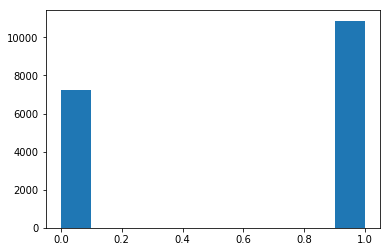

In [118]:
tmp=X_train.join(y_train)
b=tmp[tmp.delivered_to_plan==0]#.sample(n=3000,random_state=4)
a=tmp[tmp.delivered_to_plan==1].sample(n=int(b.shape[0]*(0.6/0.4)),random_state=4)
c=a.append(b)
X_train=c[c.columns[0:(c.shape[1]-1)]]
y_train=c[c.columns[c.shape[1]-1]]
plt.hist(y_train)
X_train.describe()
# count=0
# for i in tqdm(a+b):
# #     print(i)
#     try:
#         _=X_train.iloc[i,:]
#     except:
#         count=count+1
#         continue
# print((count))

In [119]:
def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from 
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

In [120]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]
def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_pred_, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
             markersize=15)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Decision Tree acc sc 0.7409375


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s finished


Decision Tree cross val [0.886 0.886]


No handles with labels found to put in legend.


Random Forest acc sc 0.8615625


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s finished


Random Forest cross val [0.887 0.887]


No handles with labels found to put in legend.


QDA acc sc 0.81125


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished


QDA cross val [0.869 0.863]
     pred_neg  pred_pos
neg       639      1132
pos      2717     11512


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Logistic Regression acc sc 0.842125


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s finished


Logistic Regression cross val [0.885 0.886]
     pred_neg  pred_pos
neg      1253       518
pos      8346      5883


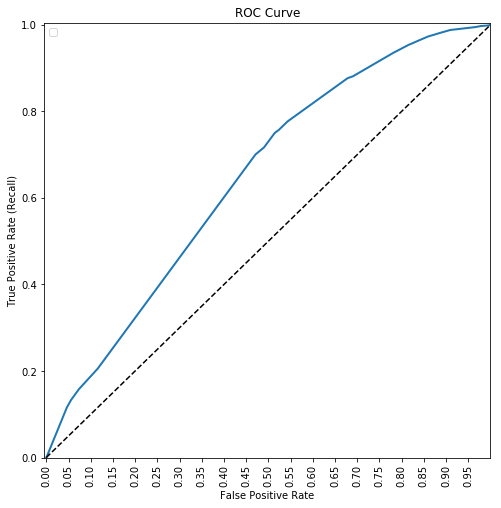

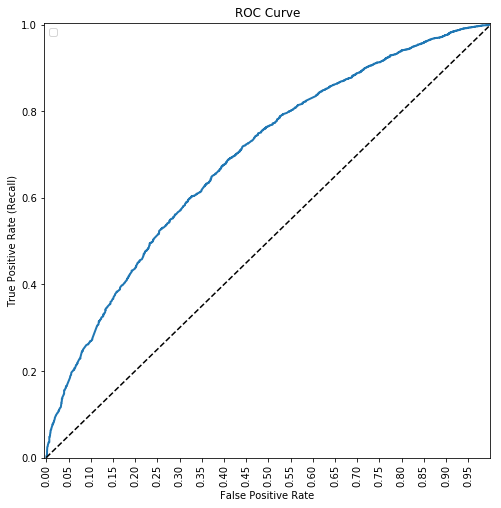

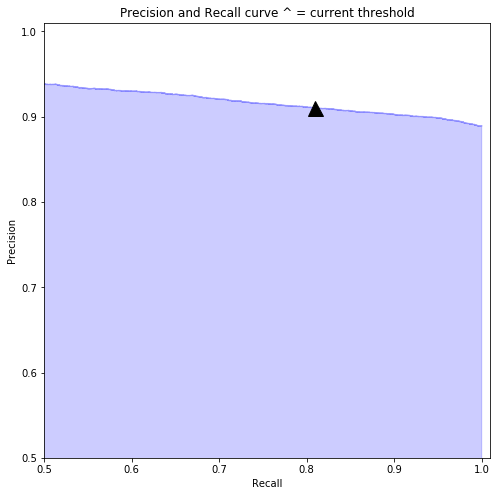

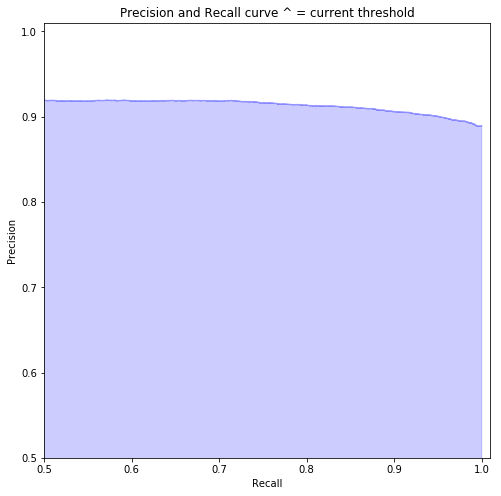

In [121]:
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_recall_curve

classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
#     MLPClassifier(alpha=1),
#     AdaBoostClassifier(),
#     GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial',verbose=1).fit(X_train, y_train)]
names = ["Decision Tree", "Random Forest", "QDA",'Logistic Regression']

for name, classifier in zip(names, classifiers):
    classifier.fit(X_train, y_train)
#     scores = cross_val_score(classifier, X, y, cv=5,verbose=1)
    y_pred = classifier.predict(X_test)
    print(name,'acc sc',accuracy_score(y_test, y_pred))

    scores = cross_val_score(classifier, X, y, cv=2,verbose=1)
    print(name,'cross val',scores)
    if hasattr(classifier, "decision_function"):
        y_pred_ = classifier.decision_function(X_test.values)
        p, r, thresholds = precision_recall_curve(y_test, y_pred_)
        precision_recall_threshold(p, r, thresholds, 0.30)
    else:
        y_pred_ = classifier.predict_proba(X_test.values)
        fpr,tpr,auc_scores=roc_curve(y_test,y_pred_[:,1])
        plot_roc_curve(fpr,tpr)
    
    
    
    
    

# classifier_1 =LinearSVC(dual=True,verbose=1)
# classifier_1.fit(X_train,y_train)
# y_pred = classifier_1.predict(X_test)
# print(accuracy_score(y_test, y_pred))

# # classifier = LogisticRegression(random_state=0, solver='liblinear',
# #                          multi_class='ovr',verbose=1).fit(X_train, y_train)
# classifier = LogisticRegression(random_state=0, solver='lbfgs',
#                          multi_class='multinomial',verbose=1).fit(X_train, y_train)
# y_pred = classifier.predict(X_test)
# print(accuracy_score(y_test, y_pred))

# scores = cross_val_score(classifier, X, y, cv=5,verbose=1)
# print(scores)

In [122]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(tn, fp, fn, tp)
true_positive_rate = tp/(tp+fn)
false_positive_rate = fp/(tn+fp)
precision = tp/(tp+fp)
print(true_positive_rate)
print(false_positive_rate)
print(precision)


381 1390 1136 13093
0.9201630472977722
0.784867306606437
0.9040254091003245


No handles with labels found to put in legend.


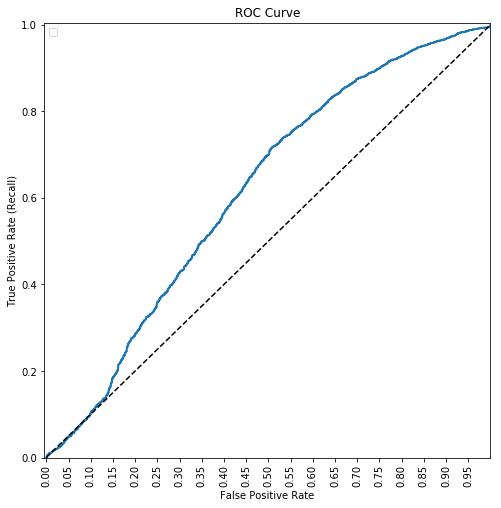

In [123]:
from sklearn.metrics import roc_curve


y_pred_ = classifier.predict_proba(X_test.values)
# print(y_pred_)
fpr,tpr,auc_scores=roc_curve(y_test,y_pred_[:,1])
# print(fpr,tpr,auc_scores)
plot_roc_curve(fpr,tpr)
# plt.savefig(r'C:\Users\Aashish\Desktop\test.png')

In [124]:
from sklearn.externals import joblib
joblib.dump(classifier,'LogiRegr.joblib')

['LogiRegr.joblib']

In [125]:
def testing(filename,filename2):
    data=pd.read_excel(filename)
    data['time_sourced']=(data.datetime_sourced-data.datetime_ordered).map(lambda x:int(x.seconds/(60)))
    data['time_make']=(data.datetime_product_ready-data.datetime_ordered).map(lambda x: int(x.seconds/(3600)))
    data['time_ready']=(data.datetime_product_ready-data.datetime_ordered).map(lambda x: int(x.days/(1)))
    data_corr=data;
    data_corr=data_corr.drop(['order_id','delivered_to_plan','datetime_ordered','datetime_sourced','datetime_product_ready','datetime_planned'],axis=1)
    col=['country','shipping_method','facility','product_category','on_sale']#categorical colums
    tmp=[];
    for i,j in enumerate(col):
        a=data_corr[j].unique()
        tmp.append(dict(zip(a,list(range(0,len(a))))))
        print(tmp[i])
        data_corr[j]=data_corr[j].map(tmp[i])
    X=PCAconv(data_corr,11)
    
    
    
    classifier = joblib.load(filename2)
    
    y_pred = classifier.predict(X)
#     print(accuracy_score(y_test, y_pred))
    sub=pandas.Dataframe(data=y_pred)
    sub.to_csv('Predicted.csv')